In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/'

# Screening
Screening_LCS = read_csv(path + 'pilot kbh hovedbanegaard and noerregade/rawdata/particle/Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)

# Brake wear data
Lund_LCS = read_csv(path + 'Lund/Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)
Lund_OPS = read_OPS(path + 'Lund/', parent_path, 0)

# Field data
Field_LCS = read_csv(path + 'cph central and nørreport measurements/Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)
Field_OPS1 = read_OPS(path + 'cph central and nørreport measurements/Station 1/OPS/', parent_path, 0)
Field_OPS2 = read_OPS(path + 'cph central and nørreport measurements/Station 2/OPS/', parent_path, -1)

# Merge dictionaries with data from train stations
DSB_LCS = merge_dicts(Screening_LCS, Field_LCS)
DSB_OPS = merge_dicts(Field_OPS1, Field_OPS2)

In [3]:
DSB_keys_cal = ['2024-09-17 LCS0076', '2024-09-17 LCS0104', 
                '2024-12-09 DG-0158', '2024-12-09 DG-0159',]
Lund_keys_cal = ['2024-10-15 DG-0049', '2024-10-15 DG-0051', '2024-10-15 LCS109', 
                 '2024-10-15 DG-0072', '2024-10-15 DG-0077']

In [4]:
Lund_idx = [[90, 165], [88, 163], [183, 258], [92, 167], [91, 166], [0, -1]] # 2 min running mean
Lund_cal_df = pd.DataFrame()

for idx, key in zip(Lund_idx[:5], Lund_keys_cal):
    print(key)
    df = Lund_LCS[key]
    smoothed_df = running_mean(df, 'PN<2.5', 'PN<2.5', 'Time', '2T', 2, None)
    smoothed_df = smoothed_df.dropna()
    print(smoothed_df.index[idx[0]], smoothed_df.index[idx[1]])
    print(len(smoothed_df.index[idx[0]:idx[1]]))
    Lund_cal_df['Time ' + key.split(' ')[1]] = np.array(smoothed_df.index[idx[0]:idx[1]])
    Lund_cal_df['PN<2.5 ' + key.split(' ')[1]] = np.array(smoothed_df['PN<2.5'][idx[0]:idx[1]])

smoothed_df = running_mean(Lund_OPS['Initial'], 'PN<2.5', 'PN2.5', 'Time', '2T', 2, None)
print('OPS')
print(smoothed_df.index[Lund_idx[-1][0]], smoothed_df.index[Lund_idx[-1][1]])
print(len(smoothed_df.index[Lund_idx[-1][0]:Lund_idx[-1][1]]))
Lund_cal_df['Time OPS'] = np.array(smoothed_df.index[Lund_idx[-1][0]:Lund_idx[-1][1]])
Lund_cal_df['PN<2.5 OPS'] = np.array(smoothed_df['PN<2.5'][Lund_idx[-1][0]:Lund_idx[-1][1]])

2024-10-15 DG-0049
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 DG-0051
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 LCS109
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 DG-0072
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 DG-0077
2024-10-15 14:00:00 2024-10-15 16:36:00
75
OPS
2024-10-15 14:04:00 2024-10-15 16:34:00
75


In [5]:
DSB_idx = [[405,530], [405,530], [370,495], [94,219], [42,167], [44,169]] # 2 min running mean
DSB_cal_df = pd.DataFrame()

for idx, key in zip(DSB_idx[:4], DSB_keys_cal):
    print(key)
    df = DSB_LCS[key]
    smoothed_df = running_mean(df, 'PN<2.5', 'PN<2.5', 'Time', '2T', 2, None)
    print(smoothed_df.index[idx[0]], smoothed_df.index[idx[1]])
    print(len(smoothed_df.index[idx[0]:idx[1]]))
    DSB_cal_df['Time ' + key.split(' ')[1]] = np.array(smoothed_df.index[idx[0]:idx[1]])
    DSB_cal_df['PN<2.5 ' + key.split(' ')[1]] = np.array(smoothed_df['PN<2.5'][idx[0]:idx[1]])

for idx, key in zip(DSB_idx[4:], ['OPS1-CPH-d1', 'OPS2-CPH-d1']):
    print(key)
    df = DSB_OPS[key]
    smoothed_df = running_mean(df, 'PN<2.5', 'PN2.5', 'Time', '2T', 2, None)
    print(smoothed_df.index[idx[0]], smoothed_df.index[idx[1]])
    print(len(smoothed_df.index[idx[0]:idx[1]]))
    DSB_cal_df['Time ' + key.split('-')[0]] = np.array(smoothed_df.index[idx[0]:idx[1]])
    DSB_cal_df['PN<2.5 ' + key.split('-')[0]] = np.array(smoothed_df['PN<2.5'][idx[0]:idx[1]])

2024-09-17 LCS0076
2024-09-17 13:30:00 2024-09-17 17:40:00
125
2024-09-17 LCS0104
2024-09-17 13:30:00 2024-09-17 17:40:00
125
2024-12-09 DG-0158
2024-12-09 12:20:00 2024-12-09 16:30:00
125
2024-12-09 DG-0159
2024-12-09 12:20:00 2024-12-09 16:30:00
125
OPS1-CPH-d1
2024-12-09 12:20:00 2024-12-09 16:30:00
125
OPS2-CPH-d1
2024-12-09 12:20:00 2024-12-09 16:30:00
125


PN<2.5 LCS0104 vs PN<2.5 LCS0076:
f(x) = 0.9908664454932202x, R2 = 0.8666484941296376
PN<2.5 DG-0158 vs PN<2.5 LCS0076:
f(x) = 0.775712356308558x, R2 = 0.945418465715872
PN<2.5 DG-0158 vs PN<2.5 LCS0104:
f(x) = 0.7748671331525863x, R2 = 0.7392157834134342
PN<2.5 DG-0159 vs PN<2.5 LCS0076:
f(x) = 0.9979362137659661x, R2 = 0.9877779494406088
PN<2.5 DG-0159 vs PN<2.5 LCS0104:
f(x) = 0.9981012648395264x, R2 = 0.8433508213175906
PN<2.5 DG-0159 vs PN<2.5 DG-0158:
f(x) = 1.2456384716510593x, R2 = 0.9663845482796882
PN<2.5 OPS1 vs PN<2.5 LCS0076:
f(x) = 1.0x, R2 = 0.9853904037064735
PN<2.5 OPS1 vs PN<2.5 LCS0104:
f(x) = 1.0x, R2 = 0.8488267773818936
PN<2.5 OPS1 vs PN<2.5 DG-0158:
f(x) = 1.2445159489866644x, R2 = 0.9686248280665885
PN<2.5 OPS1 vs PN<2.5 DG-0159:
f(x) = 1.0x, R2 = 0.9955725591006677
PN<2.5 OPS2 vs PN<2.5 LCS0076:
f(x) = 0.7841616397193454x, R2 = 0.9541630384047995
PN<2.5 OPS2 vs PN<2.5 LCS0104:
f(x) = 0.7838410237308815x, R2 = 0.7642850828473573
PN<2.5 OPS2 vs PN<2.5 DG-0158:
f(

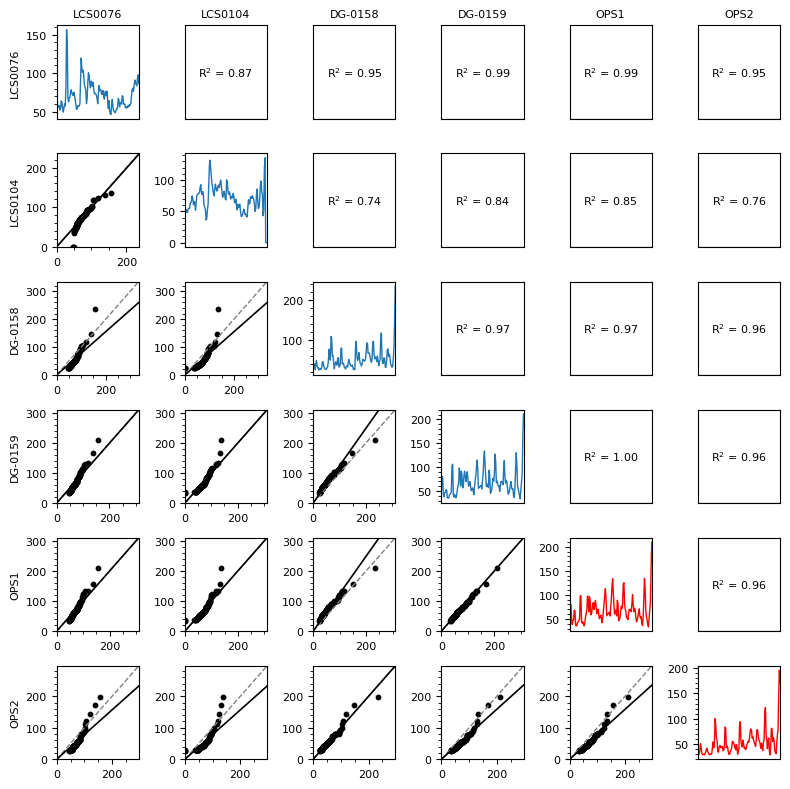

In [7]:
DSB_fig, a_DSB, R2_DSB = LCS_calibration_plot(7, (8, 8), DSB_cal_df, linear_forced_zero)
DSB_fig.tight_layout()
DSB_fig.savefig('DSB_LCS_corrected.png', dpi = 600)

PN<2.5 DG-0051 vs PN<2.5 DG-0049:
f(x) = 0.9999249443700867x, R2 = 0.9997067453052841
PN<2.5 LCS109 vs PN<2.5 DG-0049:
f(x) = 0.989608056038658x, R2 = 0.9963110250380144
PN<2.5 LCS109 vs PN<2.5 DG-0051:
f(x) = 0.989905336530373x, R2 = 0.9965286596467567
PN<2.5 DG-0072 vs PN<2.5 DG-0049:
f(x) = 0.999589482104215x, R2 = 0.9986681952671728
PN<2.5 DG-0072 vs PN<2.5 DG-0051:
f(x) = 0.9994808171777559x, R2 = 0.9981036870542593
PN<2.5 DG-0072 vs PN<2.5 LCS109:
f(x) = 0.9985714371748221x, R2 = 0.9941492126483238
PN<2.5 DG-0077 vs PN<2.5 DG-0049:
f(x) = 0.996393172042267x, R2 = 0.9921183728746747
PN<2.5 DG-0077 vs PN<2.5 DG-0051:
f(x) = 0.9961849235737353x, R2 = 0.9913088774645828
PN<2.5 DG-0077 vs PN<2.5 LCS109:
f(x) = 0.9932335800643824x, R2 = 0.985592276278454
PN<2.5 DG-0077 vs PN<2.5 DG-0072:
f(x) = 0.9966317390315527x, R2 = 0.992954815111312
PN<2.5 OPS vs PN<2.5 DG-0049:
f(x) = 1.0x, R2 = 0.9990076973169221
PN<2.5 OPS vs PN<2.5 DG-0051:
f(x) = 1.0x, R2 = 0.9988548544976447
PN<2.5 OPS vs PN

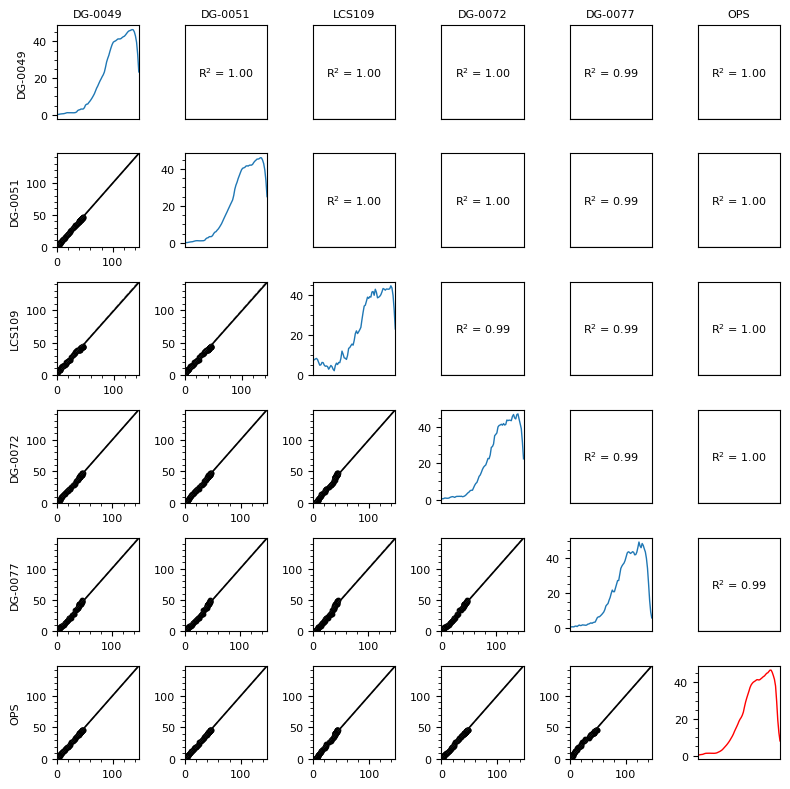

In [8]:
Lund_fig, a_Lund, R2_Lund = LCS_calibration_plot(7, (8, 8), Lund_cal_df, linear_forced_zero)
Lund_fig.tight_layout()
Lund_fig.savefig('Lund_LCS_corrected.png', dpi = 600)